# Basic Classification

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'1.11.0'

## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 37s 8us/step


In [5]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/Users/SushantJadhav/.local/lib/python3.6/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

## Preprocess the data

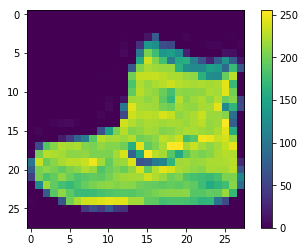

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

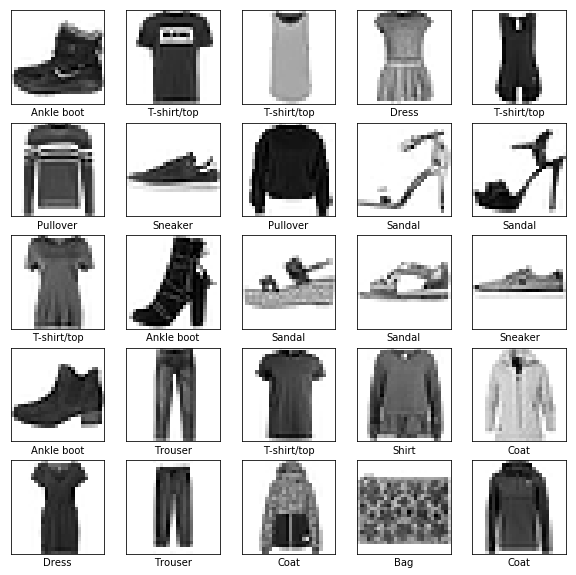

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

### Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the model

In [24]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [25]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.4942 - acc: 0.8264
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3734 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.3362 - acc: 0.8771: 0s - loss: 0.3363 - acc: 0.877
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3107 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2931 - acc: 0.8912


## Evaluate accuracy

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/step
Test accuracy: 0.8761


## Make predictions

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[0]

array([1.0983090e-05, 3.0134046e-08, 2.1387523e-08, 7.2964017e-06,
       1.2518578e-06, 1.5937262e-03, 9.9186434e-07, 1.2019700e-01,
       2.4788037e-06, 8.7818617e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

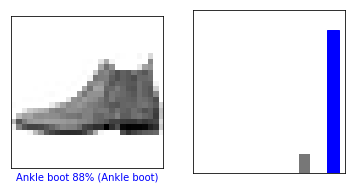

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

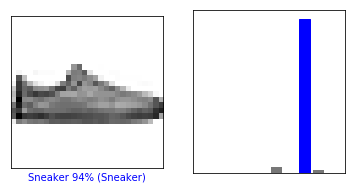

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

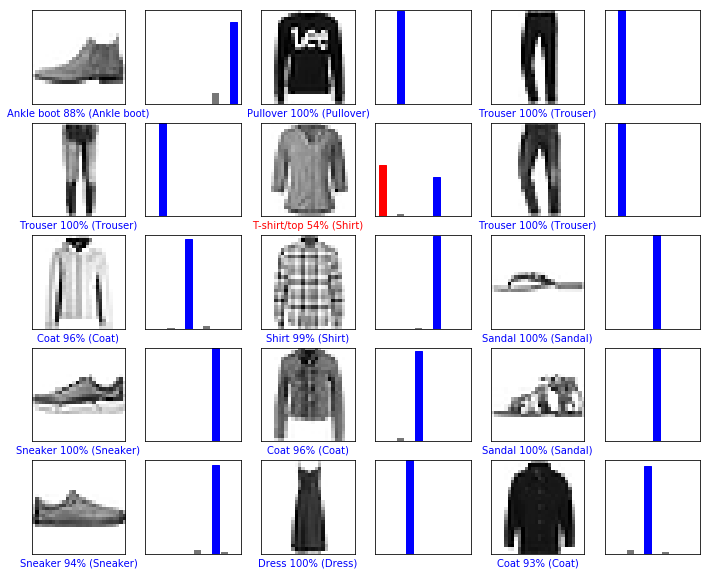

In [34]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Finally, use the trained model to make a prediction about a single image.

In [35]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.09830926e-05 3.01339931e-08 2.13874038e-08 7.29638214e-06
  1.25185807e-06 1.59372657e-03 9.91866386e-07 1.20196894e-01
  2.47880189e-06 8.78186345e-01]]


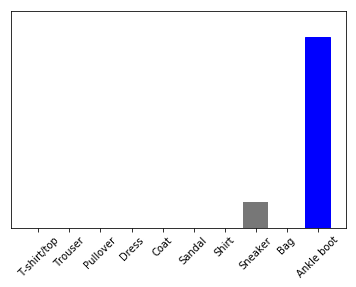

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:
np.argmax(predictions_single[0])

9